In [114]:
import sys
import torch
import importlib
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import grad  
import utils_PDE  # Ensure you import the module itself, not specific items
importlib.reload(utils_PDE)  # Reload the module to apply updates
from utils_PDE import *

In [115]:
def analytic_solution(x_bv, x_loc):
    
    a, x0 = x_bv[:,None,0], x_bv[:,None,1] 
    x, t = x_loc[None,:,0], x_loc[None,:,1] 
    sol = torch.tensor( 3*a**2 / np.cosh((a*(((x + x0) + 1 - a**2*t) % 2 - 1))/2)**2).unsqueeze(-1)
    
    return sol

def get_data(num_bv, num_loc):
    c = np.random.uniform(low=0, high=1, size=(num_bv, 1)).astype(np.float32)
    a = np.random.uniform(low=-1, high=1, size=(num_bv, 1)).astype(np.float32)
    x_bv = np.concatenate((c,a), axis=1)

    t = np.random.uniform(low=0, high=1, size=(num_loc, 1)).astype(np.float32)
    x = np.random.uniform(low=-1, high=1, size=(num_loc, 1)).astype(np.float32)
    x_loc = np.concatenate((x,t), axis=1)

    return analytic_solution(x_bv, x_loc), (x_bv, x_loc)

In [116]:
# 10 x 10 training points
y_train, X_train = get_data(100, 100)

# 10 x 10 training points
y_test, X_test = get_data(10, 10)


In [117]:
net = SDeepONet([40, 40], [40, 20], N=40, K=40)
model = Model(N=40, num_iv=10, num_t=10, net=net)
model.train(iterations=10_001)

Step 	 Train loss 	 Test loss


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 1x40)

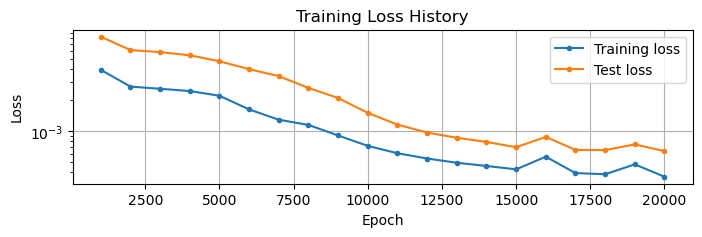

In [9]:
model.plot_losshistory()

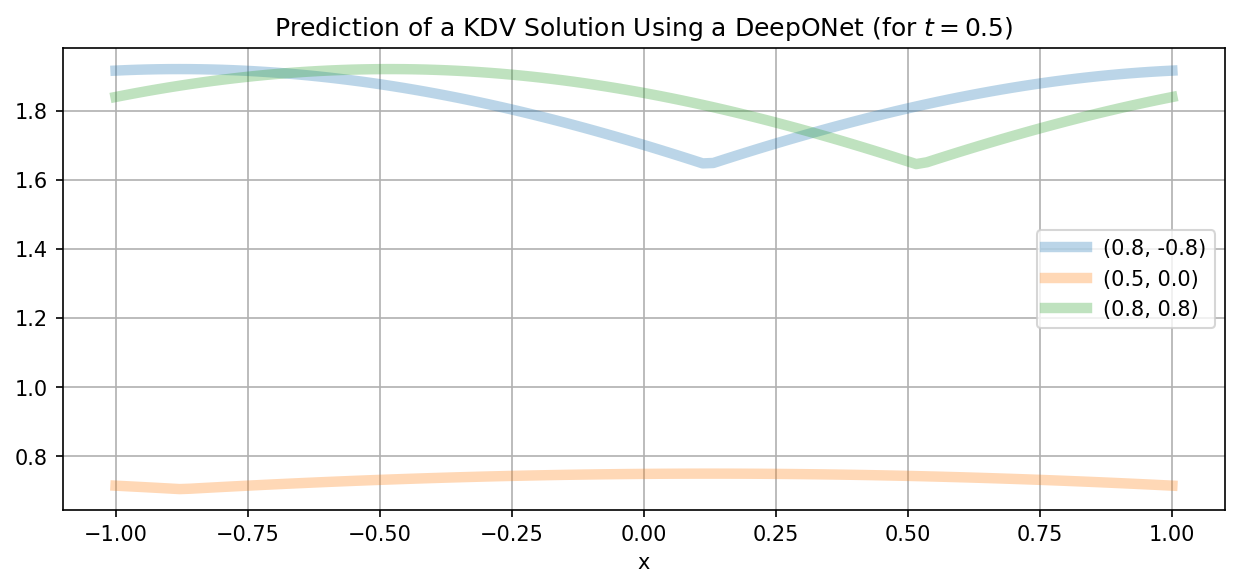

In [10]:
# Plot model prediction for one omega

# Get model prediction

T = 0.5
x_bv = np.array([[0.8, -0.8], [0.5, 0], [0.8,0.8]]).astype(np.float32)
x = torch.linspace(-1, 1, 100, dtype=torch.float32)
x_loc = torch.cartesian_prod(x, torch.tensor([T], dtype=torch.float32)).numpy()


ground_truth = analytic_solution(x_bv, x_loc)
#pred = model.predict(x_bv, x_loc)



# Plot prediction vs. solution
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

ax.set_title(f'Prediction of a KDV Solution Using a DeepONet (for $t=${T})')


for l in range(ground_truth.shape[0]):
    label = '({:.1f}, {:.1f})'.format(x_bv[l,0], x_bv[l,1])
    ax.plot(x, ground_truth[l,:,0], label=label, alpha=0.3, linewidth=5, c=f'C{l}')
    #ax.plot(x, pred[l,:,0].tolist(), '--', c=f'C{l}')

    ax.legend()
    ax.grid(True)
ax.set_xlabel("u(x,0)")
ax.set_xlabel("x")
plt.show()